In [1]:
pip install ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 42.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 67.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 77.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 38.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for ktrain: filename=ktrain-0.39.0-py3-none-any.whl size=25319737 sha256=b1d507585293cc2c15b8c73c480cbb169475be47bea076834721a4f06a2443c8
  Stored in directory: /root/.cache/pip/wheels/98/fd/0a/ef6252223f3d2

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
os.environ["CUDA_VISIBLE_DEVICES"]="0";

In [4]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import ktrain
from ktrain import text

In [5]:
categories = ["Human", "AI"]

In [6]:
data = pd.read_csv("/content/final_dataset.csv")

In [7]:
data.head()

,text,domain,name,kind,model
0,Write a detailed product description for a foo...,chatgpt,chatgpt prompts and answers,AI-written,AI
1,Write a short blog post (500 words) about the ...,chatgpt,chatgpt prompts and answers,AI-written,AI
2,"ChatGPT is rewriting Genesis. Sure, here's a p...",chatgpt,chatgpt prompts and answers,AI-written,AI
3,Please write the evolution of humans by natura...,chatgpt,chatgpt prompts and answers,AI-written,AI
4,List possible Twitter messages from dinosaurs ...,chatgpt,chatgpt prompts and answers,AI-written,AI


In [8]:
X = data["text"].tolist()
y = data["model"].tolist()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [10]:
model_name = 'distilbert-base-uncased'
trans = text.Transformer(model_name, maxlen=512, class_names=categories)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [11]:
train_data = trans.preprocess_train(X_train, y_train)
test_data = trans.preprocess_test(X_test, y_test)

preprocessing train...
language: en
train sequence lengths:
	mean : 233
	95percentile : 563
	99percentile : 678


/usr/local/lib/python3.10/dist-packages/ktrain/utils.py:744: UserWarning: class_names argument was ignored, as they were extracted from string labels in dataset
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 247
	95percentile : 593
	99percentile : 777


In [12]:
model = trans.get_classifier()

In [13]:
learner = ktrain.get_learner(model, train_data=train_data, val_data=test_data, batch_size=16 )

simulating training for different learning rates... this may take a few moments...
Epoch 1/10
114/114 [==============================] - 114s 884ms/step - loss: 0.6981 - accuracy: 0.4589
Epoch 2/10
114/114 [==============================] - 102s 901ms/step - loss: 0.5912 - accuracy: 0.7225
Epoch 3/10
114/114 [==============================] - 102s 892ms/step - loss: 0.2078 - accuracy: 0.9381
Epoch 4/10
114/114 [==============================] - 102s 891ms/step - loss: 0.1060 - accuracy: 0.9580
Epoch 5/10
114/114 [==============================] - 102s 890ms/step - loss: 0.3144 - accuracy: 0.8889
Epoch 6/10
114/114 [==============================] - 22s 183ms/step - loss: 0.7064 - accuracy: 0.6156


done.
Visually inspect loss plot and select learning rate associated with falling loss


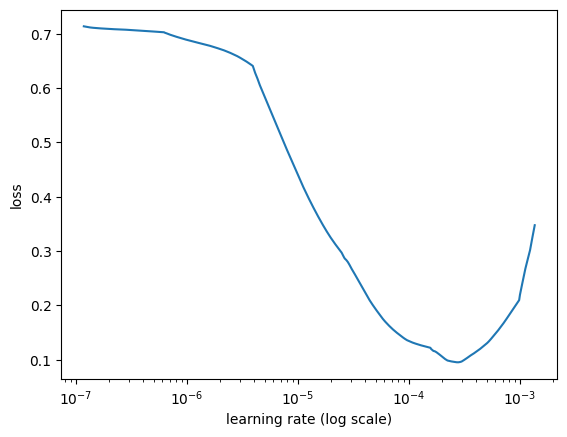

In [14]:
learner.lr_find(show_plot=True, max_epochs = 10)

In [15]:
learner.fit_onecycle(1e-4, 35)



begin training using onecycle policy with max lr of 0.0001...
Epoch 1/35
115/115 [==============================] - 123s 993ms/step - loss: 0.2235 - accuracy: 0.9058 - val_loss: 0.0575 - val_accuracy: 0.9781
Epoch 2/35
115/115 [==============================] - 112s 971ms/step - loss: 0.0354 - accuracy: 0.9907 - val_loss: 0.0101 - val_accuracy: 0.9978
Epoch 3/35
115/115 [==============================] - 112s 971ms/step - loss: 0.0170 - accuracy: 0.9929 - val_loss: 0.1490 - val_accuracy: 0.9584
Epoch 4/35
115/115 [==============================] - 112s 970ms/step - loss: 0.0138 - accuracy: 0.9962 - val_loss: 0.0091 - val_accuracy: 0.9978
Epoch 5/35
115/115 [==============================] - 113s 981ms/step - loss: 8.5714e-04 - accuracy: 1.0000 - val_loss: 0.0105 - val_accuracy: 0.9978
Epoch 6/35
115/115 [==============================] - 111s 970ms/step - loss: 4.0899e-04 - accuracy: 1.0000 - val_loss: 0.0115 - val_accuracy: 0.9978
Epoch 7/35
115/115 [==============================] 

In [16]:
learner.validate(class_names=categories)

15/15 [==============================] - 11s 618ms/step
              precision    recall  f1-score   support

       Human       0.99      1.00      1.00       155
          AI       1.00      1.00      1.00       302

    accuracy                           1.00       457
   macro avg       1.00      1.00      1.00       457
weighted avg       1.00      1.00      1.00       457



array([[155,   0],
       [  1, 301]])

/usr/local/lib/python3.10/dist-packages/ktrain/core.py:786: UserWarning: Validation value for val_accuracy wasn't found in history
  warnings.warn(


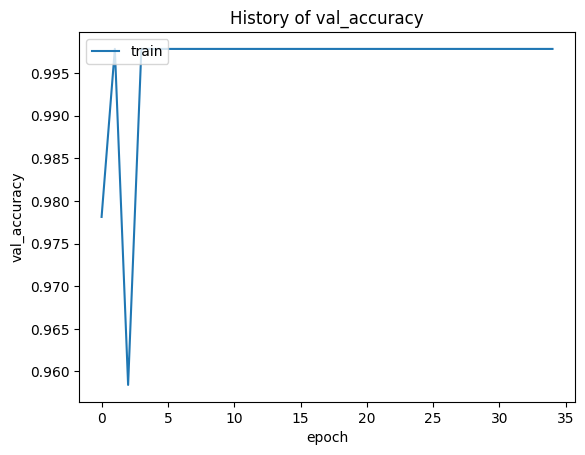

In [17]:
learner.plot('val_accuracy')

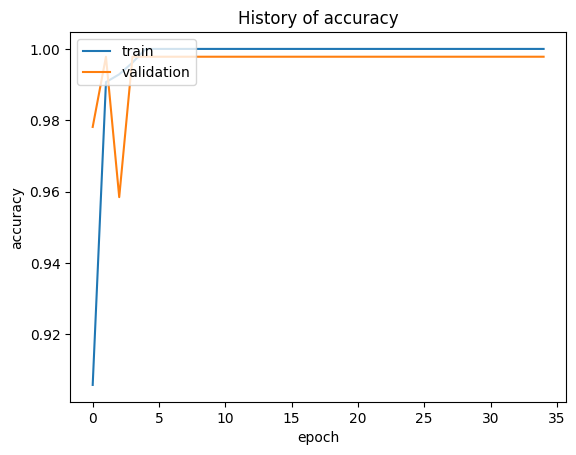

In [18]:
learner.plot('accuracy')

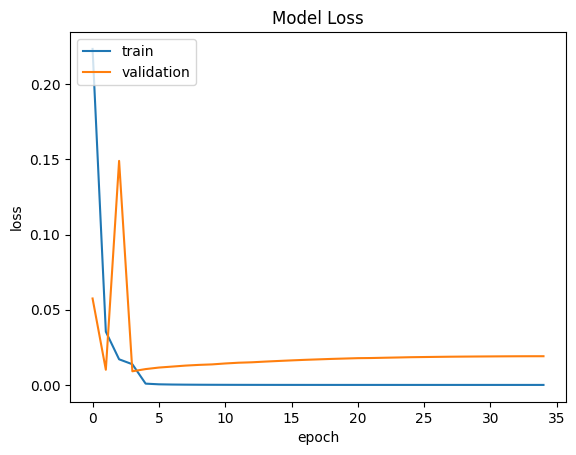

In [19]:
learner.plot('loss')

In [20]:
learner.view_top_losses(n=5, preproc=trans)

15/15 [==============================] - 9s 594ms/step
----------
id:265 | loss:8.72 | true:Human | pred:AI)



In [21]:
predictor = ktrain.get_predictor(learner.model, preproc=trans)

In [22]:
x = "The 1998 FIFA World Cup final was the final match of the 32-team 1998 FIFA World Cup, played on 12 July at the Stade de France (pictured) in Paris, France, between defending champions Brazil and hosts France. Before the match, speculation surrounded the fitness of striker Ronaldo, who was at first left out of Brazil's starting line-up, only to be restored before kick-off. France took the lead shortly before the half-hour mark, when Zinedine Zidane outjumped Leonardo to connect with a header from an in-swinging corner from the right taken by Emmanuel Petit. Zidane scored again, with another header from a corner, shortly before half-time to give France a 2–0 lead. Petit then added a third goal in second-half injury time, striking the ball low into the net following a pass by Patrick Vieira, to complete a 3–0 win for France, giving them their first World Cup title."

In [23]:
predictor.predict(x)

'Human'

In [24]:
predictor.save("/content/gdrive/My Drive/pred1.0")
